# Annex: Complete analysis

## Set the frame to work

#### First of all we have to create both a Jupyter notebook and a MongoDB server to be able to write and have a storage for the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
match = lambda a, b: [ b.index(x) if x in b else None for x in a ]


In [228]:
# MONGODB
# importing mongodb library
from pymongo import MongoClient
# conecting to mongo server from a client
client = MongoClient()

In [229]:
# clash royale db
db = client.clashroyale

In [230]:
# battle collection log
collection = db.battlelog

In [231]:
clanColl = db.clans

## Retrieve the data from the Clash Royale API

There are 2 Api. The offical on and the community of gamers. For project I have chosen the official....:
https://developer.clashroyale.com/#/   Official.   Raw data
https://royaleapi.com/:    Community. acummulated statistics and oriented to BI.

### Retrieve all battles from the location "Montserrat"

In [86]:
urltxt = 'https://api.clashroyale.com/v1/locations/57000159/rankings/clans'
locationmembersjs=requests.get(urltxt,headers=apiroyal0).json()

In [67]:
len(locationmembersjs)

2

In [68]:
locationmembersjs["items"][0]

{'tag': '#PPCQQLRL',
 'name': 'Catalan Army',
 'rank': 1,
 'previousRank': 1,
 'location': {'id': 57000159,
  'name': 'Montserrat',
  'isCountry': True,
  'countryCode': 'MS'},
 'clanScore': 50864,
 'badgeId': 16000061,
 'members': 48}

In [78]:
vectorjsblog["memberList"][1]

{'tag': '#RJPGQR8P',
 'name': 'Oriol_P',
 'role': 'coLeader',
 'expLevel': 13,
 'trophies': 5509,
 'arena': {'id': 54000017, 'name': 'League 6'},
 'clanRank': 2,
 'previousClanRank': 3,
 'donations': 774,
 'donationsReceived': 640,
 'clanChestPoints': 0}

### We retrieve each clan information and their corresponding member list information

In [ ]:
for clan in locationmembersjs["items"]:
    urltxt = 'https://api.clashroyale.com/v1/clans/%23'+clan["tag"][1:]
    clanjs=requests.get(urltxt,headers=apiroyal0).json()
    if clanColl.find_one({"tag": clan["tag"] }) == None:
        clanColl.insert_one(clanjs)
# In the following command, we make Python to write how many results it is getting. 
# It comes to a point that we get kicked out because of overextending the request for too much time.
    print(collection.count_documents({}))
    for member in clanjs["memberList"]:
        urltxt = 'https://api.clashroyale.com/v1/players/%23'+member["tag"][1:]+'/battlelog'
        vectorjsblog = requests.get(urltxt,headers=apiroyal0).json()    
# Notice that in the below command, we avoid repeating the same match
        for row in vectorjsblog:
            if collection.find_one({"battleTime": row['battleTime'] , "team.tag": row['team'][0]['tag']}) == None:
                collection.insert_one(row)


# analisis clans

### OPEN OUR MONGODB CLIENT SERVER TO GET clanColl AND collection

In [232]:
from pymongo import MongoClient
client = MongoClient()
clanColl = db.clans
collection = db.battlelog
db = client.clashroyale

In [9]:
print("Our sample consists of %d matches" % (collection.count_documents({})))

Our sample consists of 302252 matches


In [11]:
print("We have a total of %d clans" % (clanColl.count_documents({})))

We have a total of 324 clans


324

Let's get the clan collection from mongodb and turn it into a pandas dataframe 

In [237]:
clanCollDF = pd.DataFrame(clanColl.find())

Let's look for the rows and columns of clan collection dataframe

In [238]:
clanCollDF.shape

(324, 17)

To have a better image of our progress, we make Python show the first 5 results.

In [15]:
clanCollDF.head()

,_id,badgeId,clanChestLevel,clanChestMaxLevel,clanChestPoints,clanChestStatus,clanScore,clanWarTrophies,description,donationsPerWeek,location,memberList,members,name,requiredTrophies,tag,type
0,5c4ccb46f0266b39e86e6401,16000061,10,10,1600.0,inactive,48928,8111,Membres de la FCCR. Tenim equip competitiu @ro...,20490,"{'id': 57000159, 'name': 'Montserrat', 'isCoun...","[{'tag': '#QVUV20J', 'name': 'xaviermb99', 'ro...",46,ROYALL I OLI,4600,#9C9Q8YJ9,open
1,5c4cf101f0266b39e86e69ca,16000061,1,0,NaN,inactive,50857,5169,Clan català d'amics.,20682,"{'id': 57000159, 'name': 'Montserrat', 'isCoun...","[{'tag': '#29C02Q2U', 'name': 'Albert', 'role'...",48,Catalan Army,4900,#PPCQQLRL,inviteOnly
2,5c4cf135f0266b39e86e6e69,16000000,10,10,1600.0,inactive,50011,10822,Membre FCCR @FedcatCR. Pedrera @CremaCatalanaC...,23560,"{'id': 57000159, 'name': 'Montserrat', 'isCoun...","[{'tag': '#8L22UJ8GP', 'name': 'kenshinakita',...",45,CremaCatalana 2,4600,#8P9VQPCY,inviteOnly
3,5c4cf169f0266b39e86e72c9,16000025,10,10,1600.0,inactive,49783,9600,Membre de la FCCR™ / Donec Perficiam! 🎗🎗 Catal...,23700,"{'id': 57000159, 'name': 'Montserrat', 'isCoun...","[{'tag': '#2Y9LGUYVY', 'name': 'Mister MCF', '...",50,almogàvers 1714,4900,#2YYYGL,inviteOnly
4,5c4cf1a9f0266b39e86e7793,16000147,10,10,1600.0,inactive,49197,4795,Clan TOP! Diversió i respecte. Si participeu a...,22660,"{'id': 57000159, 'name': 'Montserrat', 'isCoun...","[{'tag': '#202QRJQCR', 'name': 'Llibertatpreso...",50,Catalunya,4600,#Y2YV0Y,inviteOnly


In [240]:
clanCollDF.memberList[0]

[{'tag': '#QVUV20J',
  'name': 'xaviermb99',
  'role': 'elder',
  'expLevel': 13,
  'trophies': 5598,
  'arena': {'id': 54000017, 'name': 'League 6'},
  'clanRank': 1,
  'previousClanRank': 1,
  'donations': 298,
  'donationsReceived': 600},
 {'tag': '#2V2GRYC2',
  'name': 'Lord Snow',
  'role': 'coLeader',
  'expLevel': 13,
  'trophies': 5178,
  'arena': {'id': 54000015, 'name': 'League 4'},
  'clanRank': 2,
  'previousClanRank': 4,
  'donations': 942,
  'donationsReceived': 480,
  'clanChestPoints': 24},
 {'tag': '#RC9LQL0',
  'name': 'Aparcao',
  'role': 'elder',
  'expLevel': 13,
  'trophies': 5083,
  'arena': {'id': 54000015, 'name': 'League 4'},
  'clanRank': 3,
  'previousClanRank': 2,
  'donations': 916,
  'donationsReceived': 680},
 {'tag': '#YY8GC8C',
  'name': 'Carra',
  'role': 'elder',
  'expLevel': 13,
  'trophies': 5079,
  'arena': {'id': 54000015, 'name': 'League 4'},
  'clanRank': 4,
  'previousClanRank': 6,
  'donations': 98,
  'donationsReceived': 360},
 {'tag': '#20

   ### Let's convert the battleLogDF into a Dataframe

In [236]:
battleLogDF = pd.DataFrame(collection.find())

Although we already know the rows of our battleLogDF, consisting of 302252 matches, let us show how many columns are there. After that, let's show the first 5 results.

In [17]:
battleLogDF.shape

(302252, 12)

In [18]:
battleLogDF.head()

,_id,arena,battleTime,challengeId,challengeTitle,challengeWinCountBefore,deckSelection,gameMode,opponent,team,tournamentTag,type
0,5c437870f0266b202e84aa7b,"{'id': 54000019, 'name': 'League 8'}",20190119T165530.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}","[{'tag': '#22CR9GJ', 'name': '✫ I DOoOMInIk', ...","[{'tag': '#28V9Q0', 'name': 'KING FADI™', 'sta...",NaN,PvP
1,5c437870f0266b202e84aa7c,"{'id': 54000018, 'name': 'League 7'}",20190119T164501.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}","[{'tag': '#9RC8YU08J', 'name': 'MidFinger', 's...","[{'tag': '#28V9Q0', 'name': 'KING FADI™', 'sta...",NaN,PvP
2,5c437870f0266b202e84aa7d,"{'id': 54000018, 'name': 'League 7'}",20190119T163933.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}","[{'tag': '#9PV0G', 'name': 'Rash l Carpi', 'st...","[{'tag': '#28V9Q0', 'name': 'KING FADI™', 'sta...",NaN,PvP
3,5c437870f0266b202e84aa7e,"{'id': 54000018, 'name': 'League 7'}",20190119T163436.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}","[{'tag': '#L2899URQ', 'name': 'itachi uchiha',...","[{'tag': '#28V9Q0', 'name': 'KING FADI™', 'sta...",NaN,PvP
4,5c437870f0266b202e84aa7f,"{'id': 54000018, 'name': 'League 7'}",20190119T162749.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}","[{'tag': '#QJ9CUY', 'name': 'Pasha', 'starting...","[{'tag': '#28V9Q0', 'name': 'KING FADI™', 'sta...",NaN,PvP


The information below consists of one of the dicctionaries found inside "collection", which contains the information about a match between two players.

In [18]:
collection.find_one()

{'_id': ObjectId('5c437870f0266b202e84aa7b'),
 'type': 'PvP',
 'battleTime': '20190119T165530.000Z',
 'arena': {'id': 54000019, 'name': 'League 8'},
 'gameMode': {'id': 72000006, 'name': 'Ladder'},
 'deckSelection': 'collection',
 'team': [{'tag': '#28V9Q0',
   'name': 'KING FADI™',
   'startingTrophies': 6040,
   'trophyChange': 41,
   'crowns': 2,
   'clan': {'tag': '#P22PUCUL', 'name': 'Nova l UAE', 'badgeId': 16000044},
   'cards': [{'name': 'Royal Giant',
     'id': 26000024,
     'level': 13,
     'maxLevel': 13,
     'iconUrls': {'medium': 'https://api-assets.clashroyale.com/cards/300/mnlRaNtmfpQx2e6mp70sLd0ND-pKPF70Cf87_agEKg4.png'}},
    {'name': 'Guards',
     'id': 26000025,
     'level': 8,
     'maxLevel': 8,
     'iconUrls': {'medium': 'https://api-assets.clashroyale.com/cards/300/1ArKfLJxYo6_NU_S9cAeIrfbXqWH0oULVJXedxBXQlU.png'}},
    {'name': 'Mega Minion',
     'id': 26000039,
     'level': 11,
     'starLevel': 2,
     'maxLevel': 11,
     'iconUrls': {'medium': 'http

# Data preparation

#### First step is to create some variables that will be used in our model, such as the cardname, the level and the percertange of the level.

#### Second step is to do the parse, which means changing the structure of our data, for both the player and the opponent

In [19]:
#parse=change the structure
def parse(pddf, coltxt):
     
    pddfnew = pd.DataFrame(list(pddf[coltxt].apply(lambda x: x[0])))
    pddfnew["clanTag"] = None
    for cardx in range(len(pddfnew["cards"][0])):
        pddfnew["cardName"+str(cardx+1)] = pddfnew["cards"].apply(lambda x: x[cardx]["name"])
        pddfnew["level"+str(cardx+1)] = pddfnew["cards"].apply(lambda x: x[cardx]["level"])
        pddfnew["levelP"+str(cardx+1)] = pddfnew["cards"].apply(lambda x: x[cardx]["level"])/ pddfnew["cards"].apply(lambda x: x[cardx]["maxLevel"])

    return pddfnew

team_var = parse(battleLogDF, "team")
team_var =  pd.concat([battleLogDF.drop(["team","opponent"],axis=1),team_var],axis=1)

opp_var = parse(battleLogDF, "opponent")
opp_var =  pd.concat([battleLogDF.drop(["team","opponent"],axis=1),opp_var],axis=1)

battleLogDF_T = team_var.append(opp_var)


### In the variables gameModeName and arenaName, we are interested in knowing only the name

In [20]:
battleLogDF_T["gameModeName"]=battleLogDF_T["gameMode"].apply(lambda x: x["name"])
battleLogDF_T["arenaName"]=battleLogDF_T["arena"].apply(lambda x: x["name"])


### By creating a pickle, we are able to save our data and being able to read it afterwards

In [21]:
battleLogDF_T.to_pickle("battleLogDF_T.pkl")


# Filtering

In [2]:
import pandas as pd
import numpy as np

In [2]:
battleLogDF_T = pd.read_pickle("battleLogDF_T.pkl")

In [3]:
battleLogDF_F = battleLogDF_T.copy()

In [7]:
print("Now all the Game Modes of our battleLog will be displayed:")
print(battleLogDF_F["gameModeName"].value_counts())

Now all the Game Modes of our battleLog will be displayed:
Ladder    213268
Name: gameModeName, dtype: int64


### We are only interested in "ladder", so we filter our sample

In [8]:
print(battleLogDF_T.shape)   # initial sample
battleLogDF_F = battleLogDF_F[battleLogDF_F["gameModeName"] == "Ladder"]
print(battleLogDF_F.shape) # filtering by gameMode, to be more specific; by Ladder
print("our sample goes from 604504 to 213268 matches")



(604504, 44)
(213268, 44)
our sample goes from 604504 to 213268 matches


Let us see the first 5 results of our battleLog with the columns showing the first card name and also the game mode, which will be Ladder

In [9]:
battleLogDF_F[[ 'cardName1', 'gameMode']].head()

,cardName1,gameMode
0,Royal Giant,"{'id': 72000006, 'name': 'Ladder'}"
1,Royal Giant,"{'id': 72000006, 'name': 'Ladder'}"
2,Royal Giant,"{'id': 72000006, 'name': 'Ladder'}"
3,Royal Giant,"{'id': 72000006, 'name': 'Ladder'}"
4,Royal Giant,"{'id': 72000006, 'name': 'Ladder'}"


### computing the cards list

In [10]:
cardNameVarList = ["cardName"+str(k) for k in range(9)][1:]
levelVarList = ["level"+str(k) for k in range(9)][1:]
levelPVarList = ["levelP"+str(k) for k in range(9)][1:]


In [11]:
cardNameList=[]
for x in cardNameVarList:
    cardNameList.append(battleLogDF_F[x].unique())
cardNameList = np.unique(cardNameList)

In [12]:
print("Let's see the lenght of our cardNameList, which represents the number of cards in the game:")
len(cardNameList)


Let's see the lenght of our cardNameList, which represents the number of cards in the game:


90

## Computing one feature per card

### In order to be able to introduce each card to our deck, we first create the dummy variable, which will enable us to have a number 1 in case the card appears on the deck or a 0 if not.

In [13]:
def dummys(x):
    result = np.zeros(len(cardNameList))
    result[np.isin(cardNameList,x)] = 1
    return(result.tolist())
cardsMatrix = pd.DataFrame(battleLogDF_F[cardNameVarList].apply(dummys, axis=1).values.tolist(),columns=cardNameList.tolist())
cardsMatrix.head()

,Archers,Arrows,Baby Dragon,Balloon,Bandit,Barbarian Barrel,Barbarian Hut,Barbarians,Bats,Battle Ram,...,The Log,Three Musketeers,Tombstone,Tornado,Valkyrie,Witch,Wizard,X-Bow,Zap,Zappies
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print("Let's see all the names of the cards in the game:")
cardNameListModel = cardsMatrix.columns
cardNameListModel

Let's see all the names of the cards in the game:


Index(['Archers', 'Arrows', 'Baby Dragon', 'Balloon', 'Bandit',
       'Barbarian Barrel', 'Barbarian Hut', 'Barbarians', 'Bats', 'Battle Ram',
       'Bomb Tower', 'Bomber', 'Bowler', 'Cannon', 'Cannon Cart', 'Clone',
       'Dark Prince', 'Dart Goblin', 'Electro Dragon', 'Electro Wizard',
       'Elite Barbarians', 'Elixir Collector', 'Executioner', 'Fire Spirits',
       'Fireball', 'Flying Machine', 'Freeze', 'Furnace', 'Giant',
       'Giant Skeleton', 'Giant Snowball', 'Goblin Barrel', 'Goblin Gang',
       'Goblin Giant', 'Goblin Hut', 'Goblins', 'Golem', 'Graveyard', 'Guards',
       'Heal', 'Hog Rider', 'Hunter', 'Ice Golem', 'Ice Spirit', 'Ice Wizard',
       'Inferno Dragon', 'Inferno Tower', 'Knight', 'Lava Hound', 'Lightning',
       'Lumberjack', 'Magic Archer', 'Mega Knight', 'Mega Minion', 'Miner',
       'Mini P.E.K.K.A', 'Minion Horde', 'Minions', 'Mirror', 'Mortar',
       'Musketeer', 'Night Witch', 'P.E.K.K.A', 'Poison', 'Prince', 'Princess',
       'Rage', 'Ram Ri

### computing one feature per level

In [33]:
cardNameVarList+levelPVarList

['cardName1',
 'cardName2',
 'cardName3',
 'cardName4',
 'cardName5',
 'cardName6',
 'cardName7',
 'cardName8',
 'levelP1',
 'levelP2',
 'levelP3',
 'levelP4',
 'levelP5',
 'levelP6',
 'levelP7',
 'levelP8']

In [94]:
%%time
# calculating the level per card in a ordered vector
def dummysLevel(x):
    y = x[8:].values
    x = x[:8].tolist()
    result = np.zeros(len(cardNameList))
    index1 = np.asarray([ (x.index(z) if z in x else None) for z in cardNameList.tolist() ])
    index1 = index1[index1 != np.array(None)]
    result[np.isin(cardNameList,x)] = y[index1.tolist()]
    return(result)
cardsMatrix1 = pd.DataFrame(battleLogDF_F[cardNameVarList+levelVarList].apply(dummysLevel, axis=1).values.tolist()
                           ,columns=cardNameList.tolist())
cardsMatrix1.head()


,Archers,Arrows,Baby Dragon,Balloon,Bandit,Barbarian Barrel,Barbarian Hut,Barbarians,Bats,Battle Ram,...,The Log,Three Musketeers,Tombstone,Tornado,Valkyrie,Witch,Wizard,X-Bow,Zap,Zappies
0,0.0,0.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
print("Let's compare the difference between the columns of our matches with respect to our matrix containing all the cards:")
print(battleLogDF_F.shape)
print(cardsMatrix.shape)
print(cardsMatrix1.shape)

Let's compare the difference between the columns of our matches with respect to our matrix containing all the cards:
(213268, 44)
(213268, 90)
(213268, 90)


In [96]:
# concatenate all features based on the level, not in the dummy 0/1

battleLogDF_ALL = pd.concat([battleLogDF_F.reset_index(), cardsMatrix1.reset_index()],axis=1)

In [97]:
print("Let's agreggate our battleLog with our card Matrix:")
battleLogDF_ALL.shape

Let's agreggate our battleLog with our card Matrix:


(213268, 136)

In [98]:
print("Let's see the first 5 results of our aggregate variable:")
battleLogDF_ALL.head()

Let's see the first 5 results of our aggregate variable:


,index,_id,arena,battleTime,challengeId,challengeTitle,challengeWinCountBefore,deckSelection,gameMode,tournamentTag,...,The Log,Three Musketeers,Tombstone,Tornado,Valkyrie,Witch,Wizard,X-Bow,Zap,Zappies
0,0,5c437870f0266b202e84aa7b,"{'id': 54000019, 'name': 'League 8'}",20190119T165530.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5c437870f0266b202e84aa7c,"{'id': 54000018, 'name': 'League 7'}",20190119T164501.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5c437870f0266b202e84aa7d,"{'id': 54000018, 'name': 'League 7'}",20190119T163933.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5c437870f0266b202e84aa7e,"{'id': 54000018, 'name': 'League 7'}",20190119T163436.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5c437870f0266b202e84aa7f,"{'id': 54000018, 'name': 'League 7'}",20190119T162749.000Z,NaN,NaN,NaN,collection,"{'id': 72000006, 'name': 'Ladder'}",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# saving a temporal dataframe
battleLogDF_ALL.to_pickle("battleLogDF_ALL.pkl")

In [2]:
battleLogDF_ALL = pd.read_pickle("battleLogDF_ALL.pkl")

## Matches segmentation. Factors:  League, Trophies

In [5]:
print("Let's go inside our battleLog and focus on the general descriptive statistics of Starting Trophies because we will split our sample into segments")
battleLogDF_ALL["startingTrophies"].describe()

Let's go inside our battleLog and focus on the general descriptive statistics of Starting Trophies because we will split our sample into segments


count    213246.000000
mean       4142.239038
std         670.002603
min          11.000000
25%        4026.000000
50%        4271.000000
75%        4496.000000
max        6206.000000
Name: startingTrophies, dtype: float64

In [6]:
print("As mentioned above, the sample is being splitted into some intervals to classify the matches depending on their trophies:")
pd.cut(battleLogDF_ALL["startingTrophies"],[0,1000,2000,3000,4000,4200,4400,4600,4800,5000,99999 ]).value_counts(sort=False)


As mentioned above, the sample is being splitted into some intervals to classify the matches depending on their trophies:


(0, 1000]         1543
(1000, 2000]      4271
(2000, 3000]      6237
(3000, 4000]     37640
(4000, 4200]     38549
(4200, 4400]     51017
(4400, 4600]     39622
(4600, 4800]     22437
(4800, 5000]      8458
(5000, 99999]     3472
Name: startingTrophies, dtype: int64

In [7]:
print("Another method could be splitting our battleLog every 20%")
pd.cut(battleLogDF_ALL["startingTrophies"],battleLogDF_ALL["startingTrophies"].quantile([0.,.2,.4,.6,.8,1.0])).value_counts(sort=False)


Another method could be splitting our battleLog every 20%


(11.0, 3944.0]      42697
(3944.0, 4189.0]    42800
(4189.0, 4354.0]    42706
(4354.0, 4552.0]    42450
(4552.0, 6206.0]    42592
Name: startingTrophies, dtype: int64

In [3]:
print("Let's see the quanity of matches depending on the arena they are located, to know if some leagues don't have enough information to be relevant")
leagueCount = battleLogDF_ALL["arenaName"].value_counts()
leagueCount

Let's see the quanity of matches depending on the arena they are located, to know if some leagues don't have enough information to be relevant


League 2    64698
League 1    64010
League 3    28654
Arena 12    19764
Arena 11    12140
League 4     5726
Arena 10     5384
Arena 9      2772
Arena 8      1730
Arena 7      1680
Arena 6      1494
Arena 5      1380
Arena 4      1000
Arena 3       982
League 5      830
Arena 2       478
Arena 1       302
League 6      156
League 7       78
League 8       10
Name: arenaName, dtype: int64

In [9]:
battleLogDF_ALL["arenaName"].unique()

array(['League 8', 'League 7', 'League 6', 'League 5', 'League 4',
       'League 3', 'League 2', 'Arena 11', 'Arena 10', 'League 1',
       'Arena 2', 'Arena 3', 'Arena 12', 'Arena 8', 'Arena 9', 'Arena 7',
       'Arena 6', 'Arena 5', 'Arena 4', 'Arena 1'], dtype=object)

In [4]:
codeLeagueOld = ['League 8', 'League 7', 'League 6', 'League 5', 'League 4',
       'League 3', 'League 2', 'Arena 11', 'Arena 10', 'League 1',
       'Arena 2', 'Arena 3', 'Arena 12', 'Arena 8', 'Arena 9', 'Arena 7',
       'Arena 6', 'Arena 5', 'Arena 4', 'Arena 1']
codeLeagueNew = ['League_6_8', 'League_6_8', 'League_6_8', 'League_5', 'League_4',
       'League_3', 'League_2', 'Arena_11', 'Arena_10', 'League_1',
       'Arena_2', 'Arena_3', 'Arena_12', 'Arena_8', 'Arena_9', 'Arena_7',
       'Arena_6', 'Arena_5', 'Arena_4', 'Arena_1']
codeLeagueNew = [ "Ar_" + x for x in codeLeagueNew]



In [5]:

for leagueO in codeLeagueOld:
    leagueN =  codeLeagueNew[match([ leagueO],codeLeagueOld)[0]]
    battleLogDF_ALL[leagueN] = 0
    battleLogDF_ALL.loc[battleLogDF_ALL["arenaName"]==leagueO,leagueN] = 1


In [12]:
battleLogDF_ALL[codeLeagueNew].describe()

,Ar_League_6_8,Ar_League_6_8,Ar_League_6_8,Ar_League_5,Ar_League_4,Ar_League_3,Ar_League_2,Ar_Arena_11,Ar_Arena_10,Ar_League_1,Ar_Arena_2,Ar_Arena_3,Ar_Arena_12,Ar_Arena_8,Ar_Arena_9,Ar_Arena_7,Ar_Arena_6,Ar_Arena_5,Ar_Arena_4,Ar_Arena_1
count,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000,213268.000000
mean,0.000731,0.000731,0.000731,0.003892,0.026849,0.134357,0.303365,0.056924,0.025245,0.300139,0.002241,0.004605,0.092672,0.008112,0.012998,0.007877,0.007005,0.006471,0.004689,0.001416
std,0.027036,0.027036,0.027036,0.062263,0.161642,0.341036,0.459712,0.231697,0.156869,0.458319,0.047290,0.067700,0.289973,0.089700,0.113265,0.088405,0.083404,0.080180,0.068315,0.037604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### startingTrophies cleaning

In [13]:
print(battleLogDF_ALL.shape)
print(battleLogDF_ALL[~battleLogDF_ALL.startingTrophies.isna()].shape)


(213268, 154)
(213246, 154)


In [6]:
### Filtering
battleLogDF_ALL = battleLogDF_ALL[~battleLogDF_ALL.startingTrophies.isna()]

# Defining the data matrix for the model 

In [7]:
cardNameList = ['Archers',
 'Arrows',
 'Baby Dragon',
 'Balloon',
 'Bandit',
 'Barbarian Barrel',
 'Barbarian Hut',
 'Barbarians',
 'Bats',
 'Battle Ram',
 'Bomb Tower',
 'Bomber',
 'Bowler',
 'Cannon',
 'Cannon Cart',
 'Clone',
 'Dark Prince',
 'Dart Goblin',
 'Electro Dragon',
 'Electro Wizard',
 'Elite Barbarians',
 'Elixir Collector',
 'Executioner',
 'Fire Spirits',
 'Fireball',
 'Flying Machine',
 'Freeze',
 'Furnace',
 'Giant',
 'Giant Skeleton',
 'Giant Snowball',
 'Goblin Barrel',
 'Goblin Gang',
 'Goblin Giant',
 'Goblin Hut',
 'Goblins',
 'Golem',
 'Graveyard',
 'Guards',
 'Heal',
 'Hog Rider',
 'Hunter',
 'Ice Golem',
 'Ice Spirit',
 'Ice Wizard',
 'Inferno Dragon',
 'Inferno Tower',
 'Knight',
 'Lava Hound',
 'Lightning',
 'Lumberjack',
 'Magic Archer',
 'Mega Knight',
 'Mega Minion',
 'Miner',
 'Mini P.E.K.K.A',
 'Minion Horde',
 'Minions',
 'Mirror',
 'Mortar',
 'Musketeer',
 'Night Witch',
 'P.E.K.K.A',
 'Poison',
 'Prince',
 'Princess',
 'Rage',
 'Ram Rider',
 'Rascals',
 'Rocket',
 'Royal Ghost',
 'Royal Giant',
 'Royal Hogs',
 'Royal Recruits',
 'Skeleton Army',
 'Skeleton Barrel',
 'Skeletons',
 'Sparky',
 'Spear Goblins',
 'Tesla',
 'The Log',
 'Three Musketeers',
 'Tombstone',
 'Tornado',
 'Valkyrie',
 'Witch',
 'Wizard',
 'X-Bow',
 'Zap',
 'Zappies']

cardNameList = np.array(cardNameList)[battleLogDF_ALL[cardNameList].agg(['sum']).values[0]>0]


In [8]:
print("In order to start modeling the model, we are taking into account the card names, the starting trophies and the arena in which the matches are located")
colListModel1 = cardNameList.tolist() + ['startingTrophies'] + [x for x in battleLogDF_ALL.columns.tolist() if 'Ar_' in x]

X = battleLogDF_ALL[colListModel1]
X.shape

In order to start modeling the model, we are taking into account the card names, the starting trophies and the arena in which the matches are located


(213246, 109)

In [9]:
print("To determine a victory, the trophy change after a match has to be positive. Then, the victory results will be displayed with a 1 and a 0 otherwise")
y_won = (battleLogDF_ALL.trophyChange > 0).astype(int) # logistic regression: True/False
targets = [ y_won]
y_won.value_counts()

To determine a victory, the trophy change after a match has to be positive. Then, the victory results will be displayed with a 1 and a 0 otherwise


0    109107
1    104139
Name: trophyChange, dtype: int64

# Data description

## Univariate

### validating if we have nan's

In [10]:
np.array(X.columns)[X.agg([lambda x: x.isna().sum()]).values[0]>0]

array([], dtype=object)

### validating the sum

In [11]:
X.agg([lambda x: x.sum()])

,Archers,Arrows,Baby Dragon,Balloon,Bandit,Barbarian Barrel,Barbarian Hut,Barbarians,Bats,Battle Ram,...,Ar_Arena_2,Ar_Arena_3,Ar_Arena_12,Ar_Arena_8,Ar_Arena_9,Ar_Arena_7,Ar_Arena_6,Ar_Arena_5,Ar_Arena_4,Ar_Arena_1
<lambda>,254328.0,433628.0,212287.0,168420.0,38865.0,59980.0,22503.0,158955.0,412112.0,112757.0,...,478,982,19764,1730,2772,1680,1494,1380,1000,280


In [20]:
X.describe()

,Archers,Arrows,Baby Dragon,Balloon,Bandit,Barbarian Barrel,Barbarian Hut,Barbarians,Bats,Battle Ram,...,Ar_Arena_2,Ar_Arena_3,Ar_Arena_12,Ar_Arena_8,Ar_Arena_9,Ar_Arena_7,Ar_Arena_6,Ar_Arena_5,Ar_Arena_4,Ar_Arena_1
count,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,...,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000,213246.000000
mean,1.192651,2.033464,0.995503,0.789792,0.182254,0.281271,0.105526,0.745407,1.932566,0.528765,...,0.002242,0.004605,0.092682,0.008113,0.012999,0.007878,0.007006,0.006471,0.004689,0.001313
std,3.603825,4.434628,2.273444,2.108423,0.705231,1.188871,1.004668,2.968090,4.334379,2.186242,...,0.047292,0.067704,0.289987,0.089705,0.113270,0.088409,0.083408,0.080184,0.068319,0.036212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,13.000000,8.000000,8.000000,5.000000,8.000000,11.000000,13.000000,13.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate

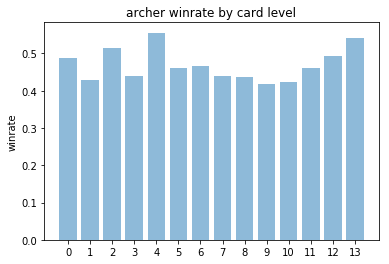

In [50]:
import matplotlib.pyplot as plt

bivar1 = pd.concat([X.Archers,y_won],axis=1)
bivar1.columns=["Archers","y_won"]
bivar1["Archers"] = bivar1["Archers"].astype(int)
bivar1 = bivar1.groupby("Archers",as_index=False)["y_won"].mean()
df = pd.DataFrame(np.array(bivar1["y_won"].tolist())).transpose()
df.columns = bivar1.Archers

value = df.mean()
std = 0.05

plt.bar(range(len(df.columns)), value, bottom=0, 
        align='center', alpha=0.5)

plt.xticks(range(len(df.columns)), df.columns)
plt.ylabel('winrate')
plt.title('archer winrate by card level')
plt.show()

We can see that the contribution o the Archer card is constant through the level of the card.

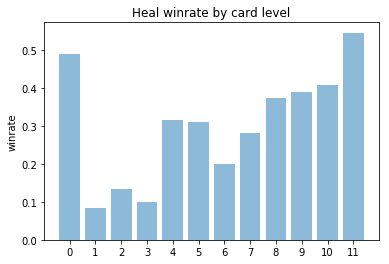

In [49]:
import matplotlib.pyplot as plt

bivar1 = pd.concat([X.Heal,y_won],axis=1)
bivar1.columns=["Heal","y_won"]
bivar1["Heal"] = bivar1["Heal"].astype(int)
bivar1 = bivar1.groupby("Heal",as_index=False)["y_won"].mean()
df = pd.DataFrame(np.array(bivar1["y_won"].tolist())).transpose()
df.columns = bivar1.Heal

value = df.mean()
std = 0.05

plt.bar(range(len(df.columns)), value, bottom=0, 
        align='center', alpha=0.5)

plt.xticks(range(len(df.columns)), df.columns)
plt.ylabel('winrate')
plt.title('Heal winrate by card level')
plt.show()

On the other hand the Heal has a low win_rate that grows rapidly throughout the card level evoution, 
showing a great win rate on its final levels.


# Modeling the card performance

## logistic regression

### Our first try to analyze the model is by doing a logistic regression

In [21]:
print("The logistic regression will be based on X, defined above and also y_won, which is the fact of winning")
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e9)
lr.fit(X,y_won)

The logistic regression will be based on X, defined above and also y_won, which is the fact of winning


C:\Users\EQUIPO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [22]:
print("Let's prepare the data to be plotted into a graph")
def plotting_result(series, name = '', col ="b"):
    pd.Series(series).sort_values().plot(kind = "barh", figsize = (8,15), color =col,title = name);

Let's prepare the data to be plotted into a graph


We can see the size of effect of each card to the win rate. 0 represents the mean effect.
Given the results and my experience in the game, I find that there it takes only into account their individual stats, because the top cards displayed are the "Legendary" category cards, which overall have the bests stats.
An important factor to consider is that the Arenas are only control variables, which are used to support the model but don't have any significance in the displayed graph.

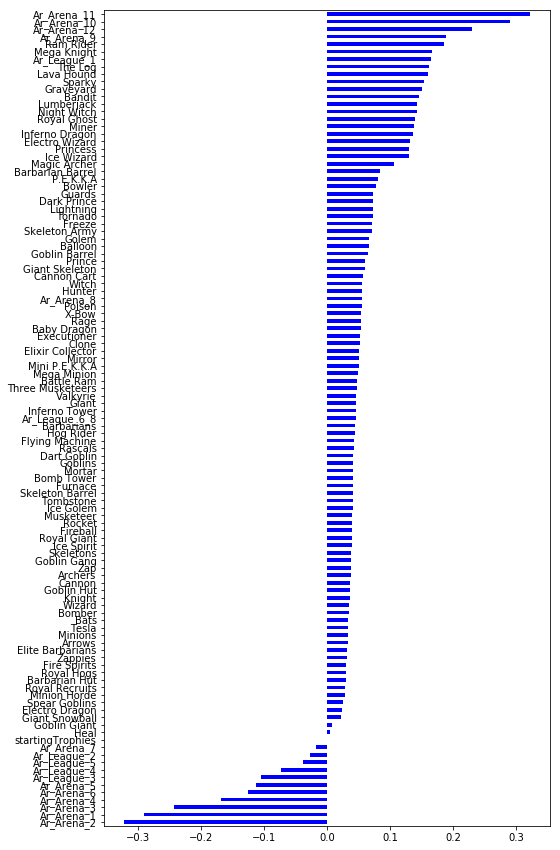

In [23]:
coef_cards = pd.Series({card:coef for coef,card in zip(lr.coef_[0] , X.columns) if card in colListModel1})
plotting_result(coef_cards)

The coefficients graph show us the effect of each card to the winrate. The logistic regression model doesn't take into account the interaction between cards that exists in a natural way into the game. additionally the LR model doesn't take into account the constrain of 8 cards of the deck.

The best card in this model is Ram Rider taking into account the Arena and trophies level.
The worstcard is the Heal. Is a card that the players don't usually use because doesn't contribute to the win.

## xgboost

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(X.values, y_won.values, test_size=0.2, random_state=666)


In [22]:
param = {'eta':0.1, 'max_depth':8, 'subsample':0.5 , 'eval_metric': 'logloss'
         , 'silent':0, 'objective':'binary:logistic', 'seed':666}

# eta: fix the learning rate velocity. From 0 to 1. Lower values prevents from overfitting (over the train sample).
# max_depth: is the maximum tree's depth. As the deck is made of 8 cards, here we will fix as an initial value 8.
# subsample: we use the half of the sample in each tree step.

dtrain = xgb.DMatrix(train_X, label=train_Y, feature_names=colListModel1)

dtest = xgb.DMatrix(test_X, label=test_Y, feature_names=colListModel1)

# specify validations set to watch performance
watchlist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 100
bst = xgb.train(param, dtrain, num_round, watchlist)

# this is prediction
preds = bst.predict(dtest)
labels = dtest.get_label()


[0]	eval-logloss:0.692472	train-logloss:0.692014
[1]	eval-logloss:0.691946	train-logloss:0.690993
[2]	eval-logloss:0.69142	train-logloss:0.69018
[3]	eval-logloss:0.691013	train-logloss:0.689294
[4]	eval-logloss:0.690688	train-logloss:0.688285
[5]	eval-logloss:0.690378	train-logloss:0.687586
[6]	eval-logloss:0.690091	train-logloss:0.686914
[7]	eval-logloss:0.68985	train-logloss:0.686245
[8]	eval-logloss:0.689544	train-logloss:0.685579
[9]	eval-logloss:0.689385	train-logloss:0.685066
[10]	eval-logloss:0.689205	train-logloss:0.684549
[11]	eval-logloss:0.688992	train-logloss:0.684185
[12]	eval-logloss:0.688901	train-logloss:0.683677
[13]	eval-logloss:0.688801	train-logloss:0.683333
[14]	eval-logloss:0.688702	train-logloss:0.682806
[15]	eval-logloss:0.688675	train-logloss:0.682331
[16]	eval-logloss:0.688509	train-logloss:0.681787
[17]	eval-logloss:0.688464	train-logloss:0.68139
[18]	eval-logloss:0.688364	train-logloss:0.680785
[19]	eval-logloss:0.688323	train-logloss:0.680293
[20]	eval-logl

In [15]:
bst.best_iteration

99

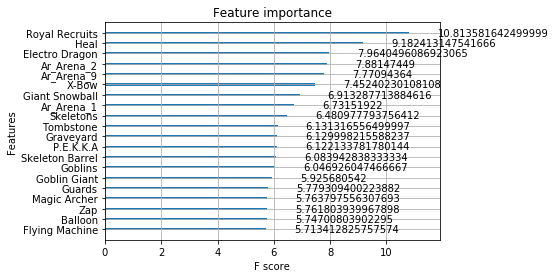

In [28]:
xgb.plot_importance(bst,importance_type ="gain",max_num_features=20)
# it needs to be more precise in the sign of the effect 

### Partial dependece plots

In [23]:
def par_dep(xs, frame, model, resolution=20, bins=None):
    
    """ Creates Pandas DataFrame containing partial dependence for a 
        single variable.
    
    Args:
        xs: Variable for which to calculate partial dependence.
        frame: Pandas DataFrame for which to calculate partial dependence.
        model: XGBoost model for which to calculate partial dependence.
        resolution: The number of points across the domain of xs for which 
                    to calculate partial dependence, default 20.
        bins: List of values at which to set xs, default 20 equally-spaced 
              points between column minimum and maximum.
    
    Returns:
        Pandas DataFrame containing partial dependence values.
        
    """
    
    # turn off pesky Pandas copy warning
    pd.options.mode.chained_assignment = None
    
    # initialize empty Pandas DataFrame with correct column names
    par_dep_frame = pd.DataFrame(columns=[xs, 'partial_dependence'])
    
    # cache original column values 
    col_cache = frame.loc[:, xs].copy(deep=True)
  
    # determine values at which to calculate partial dependence
    if bins == None:
        min_ = frame[xs].min()
        max_ = frame[xs].max()
        by = (max_ - min_)/resolution
        bins = np.arange(min_, max_, by)
        
    # calculate partial dependence  
    # by setting column of interest to constant 
    # and scoring the altered data and taking the mean of the predictions
    for j in bins:
        frame.loc[:, xs] = j
        dframe = xgb.DMatrix(frame)
        par_dep_i = pd.DataFrame(model.predict(dframe))
        par_dep_j = par_dep_i.mean()[0]
        par_dep_frame = par_dep_frame.append({xs:j,
                                              'partial_dependence': par_dep_j}, 
                                              ignore_index=True)
        
    # return input frame to original cached state    
    frame.loc[:, xs] = col_cache

    return par_dep_frame


In [34]:
par_dep_Archers1 = par_dep('Archers', pd.DataFrame(test_X, columns=colListModel1), bst) # calculate partial dependence for LIMIT_BAL
par_dep_Archers2 = par_dep('Archers', pd.DataFrame(train_X, columns=colListModel1), bst) # calculate partial dependence for LIMIT_BAL
par_dep_Heal1 = par_dep('Heal', pd.DataFrame(test_X, columns=colListModel1), bst) # calculate partial dependence for LIMIT_BAL
par_dep_Heal2 = par_dep('Heal', pd.DataFrame(train_X, columns=colListModel1), bst) # calculate partial dependence for LIMIT_BAL



In [45]:
par_dep_Archers2.head()

,Archers,partial_dependence
0,0.00,0.486702
1,0.65,0.486702
2,1.30,0.486702
3,1.95,0.486670
4,2.60,0.486630


In [37]:
par_dep_Heal1.head()

,Heal,partial_dependence
0,0.00,0.489050
1,0.55,0.374979
2,1.10,0.374979
3,1.65,0.374979
4,2.20,0.374979


In [43]:
def plot_par_dep(xs, par_dep_frame):

    
    """ Plots  partial dependence for a single variable.
    
    Args: 
        xs: Name of variable for which to plot  partial dependence.
        par_dep_frame: Name of Pandas DataFrame containing partial
                       dependence values.
    
    """
    
    # initialize figure and axis
    fig, ax = plt.subplots()
    
    # plot ICE curves
 #   par_dep_frame.drop('partial_dependence', axis=1).plot(x=xs, 
 #                                                         colormap='gnuplot',
 #                                                         ax=ax)

    # overlay partial dependence, annotate plot
    par_dep_frame.plot(title='Partial Dependence for ' + str(xs),
                       x=xs, 
                       y='partial_dependence',
                       style='r-', 
                       linewidth=3, 
                       ax=ax)



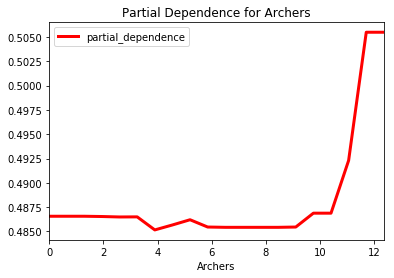

In [47]:
plot_par_dep('Archers', par_dep_Archers1)

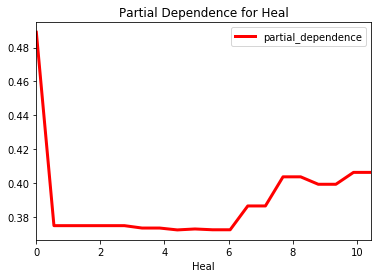

In [48]:
plot_par_dep('Heal', par_dep_Heal1)

### scatterplot of gains and coefs

In [29]:
# capturing the values
xgbGains = bst.get_score(importance_type='gain')
logRegCoef = {card:coef for coef,card in zip(lr.coef_[0] , X.columns) if card in colListModel1}
xgbGainsNames= [k for k in xgbGains.keys()]
xgbGainsvalues= [k for k in xgbGains.values()]
logRegCoefNames= [k for k in logRegCoef.keys()]
logRegCoefvalues= [k for k in logRegCoef.values()]
print(xgbGainsNames[88])
print(xgbGainsNames[0])
print(logRegCoefNames[88])
print(logRegCoefNames[0])



Giant Snowball
Zap
Zap
Archers


In [30]:
# reordering coefs as gains
xgbGainsNames1 = [xgbGainsNames[k] for k in match(cardNameList.tolist(),xgbGainsNames)]
xgbGainsValues1 = [xgbGainsvalues[k] for k in match(cardNameList.tolist(),xgbGainsNames)]
logRegCoefNames1 = [logRegCoefNames[k] for k in match(cardNameList.tolist(),logRegCoefNames)]
logRegCoefValues1 = [logRegCoefvalues[k] for k in match(cardNameList.tolist(),logRegCoefNames)]


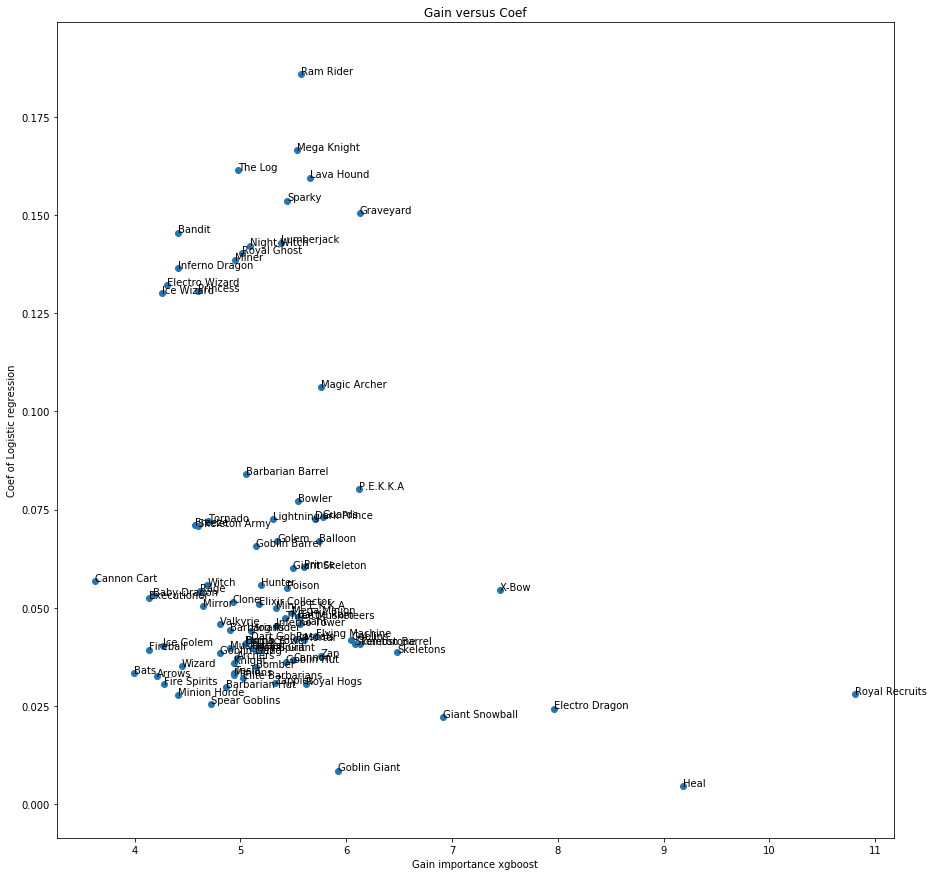

In [31]:
# plotting 
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(xgbGainsValues1, logRegCoefValues1)

plt.title("Gain versus Coef")
plt.xlabel("Gain importance xgboost")
plt.ylabel("Coef of Logistic regression")

for i, txt in enumerate(xgbGainsNames1):
    ax.annotate(txt, (xgbGainsValues1[i], logRegCoefValues1[i]))

Royale Recruits card is according to xgboost model, an important card. However, it doesn't mention whether it's positive or a negative contributor.
In order to pay enough attention to cards that have a positive contribution coeficient, we filter the plot by conditioning the plot to show only the ones that have a Logistic Regression coefficient greater than 0.06. 

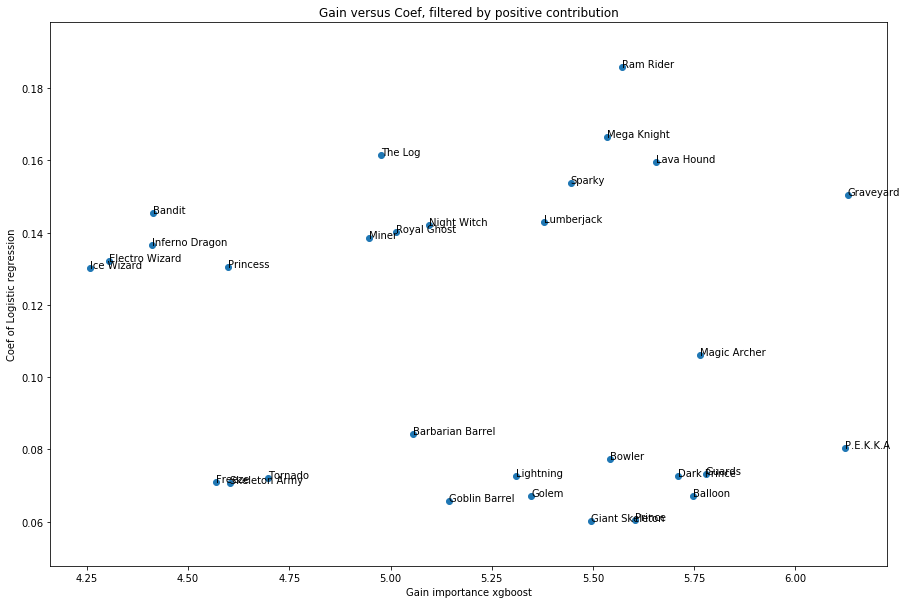

In [32]:
# plotting 
xgbGainsValues2 = np.array(xgbGainsValues1)[np.array(logRegCoefValues1)>0.06]
logRegCoefValues2 = np.array(logRegCoefValues1)[np.array(logRegCoefValues1)>0.06]
xgbGainsNames2 = np.array(xgbGainsNames1)[np.array(logRegCoefValues1)>0.06]


fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(xgbGainsValues2, logRegCoefValues2)

plt.title("Gain versus Coef, filtered by positive contribution")
plt.xlabel("Gain importance xgboost")
plt.ylabel("Coef of Logistic regression")

for i, txt in enumerate(xgbGainsNames2):
    ax.annotate(txt, (xgbGainsValues2[i], logRegCoefValues2[i]))

We can see that the cards with a Logistic Regression coefficient greater than 0.10 are all of them Legendary rarity (The category which has the lowest acquisition rate). It's interesting to notice that according to the gain importance of xgboost model shows a noticeable difference between this cards. For instance, the Ice Wizard has a low importance gain whereas graveyard has a big importance gain, having both a similar coefficient. This fact could mean that although Ice Wizard has a high marginal contribution, detected by the logistic regression, has a low synergy considering having to play it in combination with the rest of the deck.
Moreover, PEKKA has a middle coefficient and a high importance gain due to this high synergy with other good cards.

# Use case: deck optimization

In order to analyse this case, we set fixed a certain user with a specific deck and we make create the strongest 8 card combination taking into account the available deck the user has.
First of all, this will be done from the Logistic Regression model and afterwards the xgboost model will be performed. The objective is to evaluate which methodology leads us to the most effective deck, comparing the results with my expertise in the game.

In [33]:
availableCards = {'Musketeer': 9,
 'Electro Wizard': 2,
 'Knight': 11,
 'Minion Horde': 12,
 'Cannon Cart': 6,
 'Fire Spirits': 11,
 'Inferno Tower': 8,
 'Golem': 5,
 'Dark Prince': 6,
 'Witch': 6,
 'Sparky': 2,
 'Tombstone': 9,
 'Royal Giant': 10,
 'Ice Spirit': 13,
 'Mirror': 4,
 'Royal Recruits': 9,
 'Giant Skeleton': 4,
 'Skeletons': 10,
 'P.E.K.K.A': 6,
 'Executioner': 5,
 'Skeleton Barrel': 9,
 'Barbarian Barrel': 6,
 'Dart Goblin': 9,
 'Spear Goblins': 10,
 'X-Bow': 5,
 'Guards': 6,
 'Prince': 7,
 'Graveyard': 3,
 'Giant Snowball': 9,
 'Bomber': 8,
 'Zappies': 8,
 'Elixir Collector': 9,
 'Clone': 4,
 'Balloon': 6,
 'Royal Hogs': 7,
 'Flying Machine': 9,
 'Mortar': 10,
 'Night Witch': 2,
 'Princess': 2,
 'Goblin Barrel': 5,
 'Hunter': 6,
 'Tornado': 5,
 'Fireball': 9,
 'Rascals': 11,
 'Valkyrie': 9,
 'Minions': 12,
 'Baby Dragon': 5,
 'Lightning': 6,
 'Lava Hound': 2,
 'Barbarians': 10,
 'Tesla': 10,
 'Heal': 6,
 'Rage': 5,
 'Goblin Giant': 2,
 'Rocket': 9,
 'Elite Barbarians': 11,
 'Electro Dragon': 4,
 'Bomb Tower': 5,
 'Freeze': 5,
 'Arrows': 11,
 'Goblin Hut': 8,
 'Wizard': 10,
 'Inferno Dragon': 3,
 'Ram Rider': 2,
 'Goblins': 11,
 'Three Musketeers': 8,
 'Mega Knight': 2,
 'Bandit': 2,
 'Skeleton Army': 4,
 'Furnace': 7,
 'Goblin Gang': 12,
 'Royal Ghost': 2,
 'Bowler': 6,
 'Barbarian Hut': 7,
 'Magic Archer': 2,
 'Cannon': 10,
 'Battle Ram': 9,
 'Archers': 12,
 'Ice Golem': 8,
 'Hog Rider': 8,
 'Lumberjack': 3,
 'Ice Wizard': 2,
 'Giant': 11,
 'Mega Minion': 11,
 'Zap': 13,
 'Poison': 8,
 'Mini P.E.K.K.A': 11,
 'Bats': 13,
 'Miner': 4,
 'The Log': 4}

In [47]:
#actual deck
usecase1 = X[(battleLogDF_ALL.tag=="#YY8GC8C")][0:1].copy()
usecase1[X.columns[(usecase1>0).values[0]]]

,Bats,Giant,Mega Minion,Miner,Mini P.E.K.K.A,Poison,The Log,Zap,startingTrophies,Ar_League_4
55,13.0,11.0,11.0,4.0,11.0,8.0,4.0,13.0,5020.0,1


In [43]:
battleDeck0 = {'Bats': 13, 'Giant':11, 'Mega Minion':11, 'Miner': 4, 'Mini P.E.K.K.A': 11, 'Poison': 8,
       'The Log': 4, 'Zap': 13}

In [44]:
battleDeckOrdered = list(battleDeck0.keys())

In [199]:
# number of sweeps applied to the whole deck
N_SWEEPS = 5
# initialize the new deck container
newBattleDeckOrderedLR  = battleDeckOrdered.copy()
newBattleDeckOrderedXGB = battleDeckOrdered.copy()
# initialize the vector for the deck probability prediction
newUsecase1LR = usecase1.copy()
newUsecase1XGB = usecase1.copy()
# deck container for every sweep.
BattleDeckOrderedLRList  = [newBattleDeckOrderedLR.copy()]
BattleDeckOrderedXGBList = [newBattleDeckOrderedXGB.copy()]
# probability container in each proposed deck
probBattleDeckOrderedLR  = [pd.DataFrame(lr.predict_proba(newUsecase1LR), columns=["prob0","prob1"])["prob1"].max()]
probBattleDeckOrderedXGB  = [bst.predict(xgb.DMatrix(newUsecase1XGB.values, feature_names=colListModel1)).max()]

print(newBattleDeckOrderedLR)

# for every sweep
for sweepi in range(N_SWEEPS):
# we fix one card that we want the change by another card with better winrate inside the deck
    for pos in range(len(battleDeckOrdered)):
        #### Logistic regression optimization based
# recover the available cards (not in the deck, except the fixed card in this step)
        availablePosLR = np.array(list(availableCards.keys()))[~np.isin(np.array(list(availableCards.keys())),
                                         (np.array(newBattleDeckOrderedLR)[[z for z in range(len(newBattleDeckOrderedLR)) if z != pos]]))]
# construct the pandas with all available cards, one row for each available card replacing the fixed card
        matrixLR = newUsecase1LR.append([newUsecase1LR]*(len(availablePosLR)-1),ignore_index=True)
        matrixLR[newBattleDeckOrderedLR[pos]] = 0
        for cardi in range(len(availablePosLR)):
            matrixLR.loc[cardi,availablePosLR[cardi]] = availableCards[availablePosLR[cardi]]
        
# initialize the next step with value 0 in the old fixed card position
        newUsecase1LR[newBattleDeckOrderedLR[pos]]=0
        
        cardLROld = newBattleDeckOrderedLR[pos]
        
# select the best card that replaces the fixed based on logistic regression algorithm
        probMatLR = pd.DataFrame(lr.predict_proba(matrixLR), columns=["prob0","prob1"])["prob1"]
        newBattleDeckOrderedLR[pos] = availablePosLR[probMatLR.argmax()].tolist()
        cardLRNew = newBattleDeckOrderedLR[pos]
        
# initialize the next step with value 1 in the new selected card position

        newUsecase1LR[newBattleDeckOrderedLR[pos]]=availableCards[newBattleDeckOrderedLR[pos]]

        #### xgboost optimization based
        availablePosXGB = np.array(list(availableCards.keys()))[~np.isin(np.array(list(availableCards.keys())),
                                         (np.array(newBattleDeckOrderedXGB)[[z for z in range(len(newBattleDeckOrderedXGB)) if z != pos]]))]

        matrixXGB = newUsecase1XGB.append([newUsecase1XGB]*(len(availablePosXGB)-1),ignore_index=True)
        matrixXGB[newBattleDeckOrderedXGB[pos]] = 0
        for cardi in range(len(availablePosXGB)):
            matrixXGB.loc[cardi,availablePosXGB[cardi]] =  availableCards[availablePosXGB[cardi]]

        dtest1 = xgb.DMatrix(matrixXGB.values, feature_names=colListModel1)
        
        newUsecase1XGB[newBattleDeckOrderedXGB[pos]]=0
        
        cardXGBOld = newBattleDeckOrderedXGB[pos]
        
        probMatXGB = bst.predict(dtest1)
        newBattleDeckOrderedXGB[pos] = availablePosXGB[probMatXGB.argmax()].tolist()
        cardXGBNew = newBattleDeckOrderedXGB[pos]
        
        newUsecase1XGB[newBattleDeckOrderedXGB[pos]]=availableCards[newBattleDeckOrderedXGB[pos]]
        
        print("LR: I've changed card: "+cardLROld+" by : "+cardLRNew)
        print("XGB: I've changed card: "+cardXGBOld+" by : "+cardXGBNew)
    
# save the proposed deck in each sweep.
    probBattleDeckOrderedLR.append(probMatLR.max())
    probBattleDeckOrderedXGB.append(probMatXGB.max())

    BattleDeckOrderedLRList.append(newBattleDeckOrderedLR.copy())
    BattleDeckOrderedXGBList.append(newBattleDeckOrderedXGB.copy())
    
    print("LR: proposed new deck: "+'|'.join(newBattleDeckOrderedLR) )
    print("XGB: proposed new deck: "+'|'.join(newBattleDeckOrderedXGB))

    

['Bats', 'Giant', 'Mega Minion', 'Miner', 'Mini P.E.K.K.A', 'Poison', 'The Log', 'Zap']
LR: I've changed card: Bats by : Ice Spirit
XGB: I've changed card: Bats by : Inferno Dragon


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Giant by : Barbarian Barrel
XGB: I've changed card: Giant by : Lightning


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mega Minion by : Mega Minion
XGB: I've changed card: Mega Minion by : Mega Minion


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Miner by : Miner
XGB: I've changed card: Miner by : Graveyard


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A
XGB: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Poison by : Giant
XGB: I've changed card: Poison by : Poison


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: The Log by : The Log
XGB: I've changed card: The Log by : The Log


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Zap by : Zap
XGB: I've changed card: Zap by : Zap
LR: proposed new deck: Ice Spirit|Barbarian Barrel|Mega Minion|Miner|Mini P.E.K.K.A|Giant|The Log|Zap
XGB: proposed new deck: Inferno Dragon|Lightning|Mega Minion|Graveyard|Mini P.E.K.K.A|Poison|The Log|Zap


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Ice Spirit by : Ice Spirit
XGB: I've changed card: Inferno Dragon by : Inferno Dragon


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Barbarian Barrel by : Barbarian Barrel
XGB: I've changed card: Lightning by : Lightning


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mega Minion by : Mega Minion
XGB: I've changed card: Mega Minion by : Mega Minion


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Miner by : Miner
XGB: I've changed card: Graveyard by : Graveyard


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A
XGB: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Giant by : Giant
XGB: I've changed card: Poison by : Poison


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: The Log by : The Log
XGB: I've changed card: The Log by : The Log


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Zap by : Zap
XGB: I've changed card: Zap by : Zap
LR: proposed new deck: Ice Spirit|Barbarian Barrel|Mega Minion|Miner|Mini P.E.K.K.A|Giant|The Log|Zap
XGB: proposed new deck: Inferno Dragon|Lightning|Mega Minion|Graveyard|Mini P.E.K.K.A|Poison|The Log|Zap


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Ice Spirit by : Ice Spirit
XGB: I've changed card: Inferno Dragon by : Inferno Dragon


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Barbarian Barrel by : Barbarian Barrel
XGB: I've changed card: Lightning by : Lightning


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mega Minion by : Mega Minion
XGB: I've changed card: Mega Minion by : Mega Minion


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Miner by : Miner
XGB: I've changed card: Graveyard by : Graveyard


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A
XGB: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Giant by : Giant
XGB: I've changed card: Poison by : Poison


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: The Log by : The Log
XGB: I've changed card: The Log by : The Log


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Zap by : Zap
XGB: I've changed card: Zap by : Zap
LR: proposed new deck: Ice Spirit|Barbarian Barrel|Mega Minion|Miner|Mini P.E.K.K.A|Giant|The Log|Zap
XGB: proposed new deck: Inferno Dragon|Lightning|Mega Minion|Graveyard|Mini P.E.K.K.A|Poison|The Log|Zap


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Ice Spirit by : Ice Spirit
XGB: I've changed card: Inferno Dragon by : Inferno Dragon


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Barbarian Barrel by : Barbarian Barrel
XGB: I've changed card: Lightning by : Lightning


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mega Minion by : Mega Minion
XGB: I've changed card: Mega Minion by : Mega Minion


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Miner by : Miner
XGB: I've changed card: Graveyard by : Graveyard


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A
XGB: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Giant by : Giant
XGB: I've changed card: Poison by : Poison


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: The Log by : The Log
XGB: I've changed card: The Log by : The Log


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Zap by : Zap
XGB: I've changed card: Zap by : Zap
LR: proposed new deck: Ice Spirit|Barbarian Barrel|Mega Minion|Miner|Mini P.E.K.K.A|Giant|The Log|Zap
XGB: proposed new deck: Inferno Dragon|Lightning|Mega Minion|Graveyard|Mini P.E.K.K.A|Poison|The Log|Zap


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Ice Spirit by : Ice Spirit
XGB: I've changed card: Inferno Dragon by : Inferno Dragon


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Barbarian Barrel by : Barbarian Barrel
XGB: I've changed card: Lightning by : Lightning


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mega Minion by : Mega Minion
XGB: I've changed card: Mega Minion by : Mega Minion


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Miner by : Miner
XGB: I've changed card: Graveyard by : Graveyard


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A
XGB: I've changed card: Mini P.E.K.K.A by : Mini P.E.K.K.A


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Giant by : Giant
XGB: I've changed card: Poison by : Poison


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: The Log by : The Log
XGB: I've changed card: The Log by : The Log


C:\Users\EQUIPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


LR: I've changed card: Zap by : Zap
XGB: I've changed card: Zap by : Zap
LR: proposed new deck: Ice Spirit|Barbarian Barrel|Mega Minion|Miner|Mini P.E.K.K.A|Giant|The Log|Zap
XGB: proposed new deck: Inferno Dragon|Lightning|Mega Minion|Graveyard|Mini P.E.K.K.A|Poison|The Log|Zap


In [200]:
### Results for logistic regression

pd.concat([pd.DataFrame(BattleDeckOrderedLRList),pd.DataFrame(probBattleDeckOrderedLR)],axis=1,ignore_index=True)


,0,1,2,3,4,5,6,7,8
0,Bats,Giant,Mega Minion,Miner,Mini P.E.K.K.A,Poison,The Log,Zap,0.534057
1,Ice Spirit,Barbarian Barrel,Mega Minion,Miner,Mini P.E.K.K.A,Giant,The Log,Zap,0.568943
2,Ice Spirit,Barbarian Barrel,Mega Minion,Miner,Mini P.E.K.K.A,Giant,The Log,Zap,0.568943
3,Ice Spirit,Barbarian Barrel,Mega Minion,Miner,Mini P.E.K.K.A,Giant,The Log,Zap,0.568943
4,Ice Spirit,Barbarian Barrel,Mega Minion,Miner,Mini P.E.K.K.A,Giant,The Log,Zap,0.568943
5,Ice Spirit,Barbarian Barrel,Mega Minion,Miner,Mini P.E.K.K.A,Giant,The Log,Zap,0.568943


The Logistic regression model doesn't take into account the interactions between cards and their corresponding synergy. It only takes into account the individual values of the cards and therefore the final result has been a combination of 8 cards that aren’t realistic (given my knowledge in the game). Therefore, an aspect of improvement to this model would be to make it consider the interactions between cards and also add to the model a variable such as the elixir cost, which would then improve the result as we could set the fact of having a greater cost of elixir as a method of decreasing the probability of winning. However, the fact of being a linear model makes it difficult to consider interactions. Thus, we notice a clear disadvantage with respect to the XGBoost model, which does take into consideration this factor.

In [201]:
### Results for xgboost

pd.concat([pd.DataFrame(BattleDeckOrderedXGBList),pd.DataFrame(probBattleDeckOrderedXGB)],axis=1,ignore_index=True)


,0,1,2,3,4,5,6,7,8
0,Bats,Giant,Mega Minion,Miner,Mini P.E.K.K.A,Poison,The Log,Zap,0.575267
1,Inferno Dragon,Lightning,Mega Minion,Graveyard,Mini P.E.K.K.A,Poison,The Log,Zap,0.713631
2,Inferno Dragon,Lightning,Mega Minion,Graveyard,Mini P.E.K.K.A,Poison,The Log,Zap,0.713631
3,Inferno Dragon,Lightning,Mega Minion,Graveyard,Mini P.E.K.K.A,Poison,The Log,Zap,0.713631
4,Inferno Dragon,Lightning,Mega Minion,Graveyard,Mini P.E.K.K.A,Poison,The Log,Zap,0.713631
5,Inferno Dragon,Lightning,Mega Minion,Graveyard,Mini P.E.K.K.A,Poison,The Log,Zap,0.713631


The XGBoost model shows a better performance by considering some interactions between cards (given my experience in the game). For example, it has a win condition (when a deck is based on supporting a specific card that will be the one defeating the enemy tower) such as the “Graveyard” and many cards that synergize with it like the “Poison” and the “Mega Minion”. It also has defensive cards like the Inferno Dragon and the “Mini PEKKA”. Overall, the XGBoost shows a great performance in analyzing and predicting a good deck combination. However, one aspect of improvement could be the elixir cost, because as mentioned above; it could make the model to predict even better another efficient combination. As an example of this, the model would probably not consider having both the “Lightning” and the “Poison” on the same deck because they make to deck too expensive. Therefore, there is still a need of improving the model in the pursuit of the best deck.